# Analyzing the `pinochet` dataset

Taken from <https://github.com/danilofreire/pinochet>

In [1]:
!tree -L 2 ../pinochet

../pinochet
├── _config.yml
├── data
│   ├── pinochet.csv
│   ├── pinochet.RData
│   └── pinochet.xlsx
├── docs
│   ├── 404.html
│   ├── articles
│   ├── authors.html
│   ├── docsearch.css
│   ├── docsearch.js
│   ├── index.html
│   ├── LICENSE-text.html
│   ├── link.svg
│   ├── pkgdown.css
│   ├── pkgdown.js
│   ├── pkgdown.yml
│   └── reference
├── figures
│   ├── map.png
│   └── time-trend.png
├── manuscript
│   ├── article
│   ├── _config.yml
│   └── online-appendix
└── README.md

8 directories, 18 files


In [2]:
!cat ../pinochet/README.md

# Deaths and Disappearances in the Pinochet Regime: A New Dataset

[![CRAN\_Status\_Badge](http://www.r-pkg.org/badges/version/pinochet)](https://cran.r-project.org/package=pinochet) 
[![Travis-CI Build
Status](https://travis-ci.org/danilofreire/pinochet.svg?branch=package)](https://travis-ci.org/danilofreire/pinochet)
[![DOI](https://zenodo.org/badge/103286196.svg)](https://zenodo.org/badge/latestdoi/103286196)
[![](http://cranlogs.r-pkg.org/badges/grand-total/pinochet?color=blue)](https://cran.r-project.org/package=pinochet)

This Github repository contains data and documented R code for [Deaths and Disappearances in the Pinochet Regime: A New Dataset](https://doi.org/10.31235/osf.io/vqnwu) by Freire et al (2019). We coded the personal details of 2,398 victims named in the Chilean Truth Commission Report along with information about the perpetrators and geographical coordinates for all identifiable atrocity locations. The dataset covers from 1973 to 1990 and includes 59 indicators. P

In [3]:
!head -2 ../pinochet/data/pinochet.csv 

individual_id,group_id,start_date_daily,end_date_daily,start_date_monthly,end_date_monthly,last_name,first_name,minor,age,male,occupation,occupation_detail,victim_affiliation,victim_affiliation_detail,violence,method,interrogation,torture,mistreatment,targeted,press,war_tribunal,number_previous_arrests,perpetrator_affiliation,perpetrator_affiliation_detail,nationality,place_1,start_location_1,latitude_1,longitude_1,exact_coordinates_1,place_2,location_2,latitude_2,longitude_2,exact_coordinates_2,place_3,end_location_3,latitude_3,longitude_3,exact_coordinates_3,place_4,end_location_4,latitude_4,longitude_4,exact_coordinates_4,place_5,end_location_5,latitude_5,longitude_5,exact_coordinates_5,place_6,end_location_6,latitude_6,longitude_6,exact_coordinates_6,page,additional_comments
1,1,1973-09-12,1973-09-12,1973-09-01,1973-09-01,Corredera Reyes,Mercedes del Pilar,1,NA,0,School Student,high school,NA,NA,Killed,Gun,NA,NA,NA,NA,0,0,NA,NA,NA,Chilean,In Public,Calle Gran Avenida,-33.501342,-70

In [4]:
pinopath = "../pinochet/data/pinochet.csv"

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv(pinopath, sep=',', header=0)
df.head()

,individual_id,group_id,start_date_daily,end_date_daily,start_date_monthly,end_date_monthly,last_name,first_name,minor,age,...,latitude_5,longitude_5,exact_coordinates_5,place_6,end_location_6,latitude_6,longitude_6,exact_coordinates_6,page,additional_comments
0,1,1,1973-09-12,1973-09-12,1973-09-01,1973-09-01,Corredera Reyes,Mercedes del Pilar,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159,NaN
1,2,2,1973-09-11,1973-09-12,1973-09-01,1973-09-01,Torres Torres,Benito Heriberto,0.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159-60,NaN
2,3,3,1973-09-12,1973-09-12,1973-09-01,1973-09-01,Lira Morales,Juan Manuel,0.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN
3,4,4,1973-09-12,1973-09-14,1973-09-01,1973-09-01,Fontela Alonso,Alberto Mariano,0.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN
4,5,5,1973-09-12,1973-09-12,1973-09-01,1973-09-01,Quintilliano Cardozo,Tulio Roberto,0.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160-61,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 59 columns):
individual_id                     2398 non-null int64
group_id                          2398 non-null int64
start_date_daily                  2232 non-null object
end_date_daily                    2249 non-null object
start_date_monthly                2289 non-null object
end_date_monthly                  2307 non-null object
last_name                         2398 non-null object
first_name                        2398 non-null object
minor                             2331 non-null float64
age                               1625 non-null float64
male                              2333 non-null float64
occupation                        1820 non-null object
occupation_detail                 1732 non-null object
victim_affiliation                1453 non-null object
victim_affiliation_detail         1327 non-null object
violence                          2393 non-null object
method      

In [7]:
df.describe()

,individual_id,group_id,minor,age,male,interrogation,torture,mistreatment,press,war_tribunal,...,exact_coordinates_3,latitude_4,longitude_4,exact_coordinates_4,latitude_5,longitude_5,exact_coordinates_5,latitude_6,longitude_6,exact_coordinates_6
count,2398.000000,2398.000000,2331.000000,1625.000000,2333.000000,561.000000,796.000000,685.000000,2398.000000,2398.000000,...,466.000000,111.000000,111.000000,111.000000,32.000000,32.000000,32.000000,6.000000,6.000000,6.000000
mean,1199.500000,750.821101,0.040326,29.677674,0.956708,0.151515,0.358040,0.334307,0.036280,0.039199,...,0.706009,-31.901536,-70.992123,0.639640,-28.514519,-67.730817,0.718750,-33.658462,-70.584126,0.166667
std,692.387295,590.077072,0.196765,10.551773,0.203557,0.358870,0.479725,0.472092,0.187026,0.194109,...,0.456078,7.254840,3.380823,0.482282,14.315130,17.045161,0.456803,0.085408,0.030511,0.408248
min,1.000000,1.000000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-40.650000,-102.552780,0.000000,-40.658470,-73.155567,0.000000,-33.693330,-70.646406,0.000000
25%,600.250000,312.250000,0.000000,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-33.594037,-71.227613,0.000000,-33.585206,-71.238610,0.000000,-33.693330,-70.571670,0.000000
50%,1199.500000,603.500000,0.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,-33.484124,-70.671424,1.000000,-33.278330,-70.694232,1.000000,-33.693330,-70.571670,0.000000
75%,1798.750000,1001.000000,0.000000,35.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,-33.323599,-70.622579,1.000000,-23.110638,-69.523302,1.000000,-33.693330,-70.571670,0.000000
max,2398.000000,2722.000000,1.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,23.634500,-58.463610,1.000000,42.733880,25.485830,1.000000,-33.484124,-70.571670,1.000000


In [8]:
df.columns

Index(['individual_id', 'group_id', 'start_date_daily', 'end_date_daily',
       'start_date_monthly', 'end_date_monthly', 'last_name', 'first_name',
       'minor', 'age', 'male', 'occupation', 'occupation_detail',
       'victim_affiliation', 'victim_affiliation_detail', 'violence', 'method',
       'interrogation', 'torture', 'mistreatment', 'targeted', 'press',
       'war_tribunal', 'number_previous_arrests', 'perpetrator_affiliation',
       'perpetrator_affiliation_detail', 'nationality', 'place_1',
       'start_location_1', 'latitude_1', 'longitude_1', 'exact_coordinates_1',
       'place_2', 'location_2', 'latitude_2', 'longitude_2',
       'exact_coordinates_2', 'place_3', 'end_location_3', 'latitude_3',
       'longitude_3', 'exact_coordinates_3', 'place_4', 'end_location_4',
       'latitude_4', 'longitude_4', 'exact_coordinates_4', 'place_5',
       'end_location_5', 'latitude_5', 'longitude_5', 'exact_coordinates_5',
       'place_6', 'end_location_6', 'latitude_6', 'lon

## Codebook

Del _codebook_ ubicado en <https://osf.io/8fkxq/>, es posible obtener las descripciones de las columnas. El texto se encuentra disponible online y de acceso público, por lo que no hace falta duplicar esa información.



Sin embargo, algunas columnas contienen información que explica la naturaleza de este dataset.

### ¿Qué tipo de métodos de violencia fueron utilizados por los perpetradores?

In [9]:
df['method'].unique().tolist()

['Gun',
 nan,
 'Hung',
 'Denied Medical Treatment',
 'Beaten',
 'Asphyxiated',
 'Torture',
 'Jumped',
 'Cardio-respiratory Arrest',
 'Gun and Acute Loss of Blood',
 'Immersion',
 'Gun and Asphyxiated',
 'Cardio-respiratory Arrest and Torture',
 'Denied Medical Treatment and Torture',
 'Poisoned',
 'Knife',
 'Gun and Knife',
 'Burned',
 'Bomb',
 'Gun and Bomb',
 'Tear Gas',
 'Gun and Torture',
 'Beaten and Immersion',
 'Electrocuted',
 'Acute Loss of Blood',
 'Intentional Car Crash']

### ¿Cuántos menores figuran en el informe?

In [10]:
df[df['minor'] == 1.0].count()['minor']

94

### ¿Cuál es la edad promedio de las personas en el informe?

In [11]:
df['age'].mean()

29.677673846153848

### ¿Qué edad tenía la persona más joven del informe?

In [12]:
print(f'{df["age"].min() * 12} meses')  # los valores están en años, queremos expresarlos en meses.

2.64 meses


### ¿Cómo se distribuyen las ocupaciones?

In [13]:
df[['occupation', 'individual_id']].groupby(['occupation']).count().sort_values(by='individual_id', ascending=False)

,individual_id
occupation,
Blue Collar,896
White Collar,429
Non-military Government,151
University Student,140
School Student,88
Military,59
Unemployed,15
Housewife,8
White Collar and University Student,7


_Blue collar_ se refiere a obreros, de acuerdo a [Wikipedia](https://en.wikipedia.org/wiki/Blue-collar_worker), mientras que _White collar_ se refiere [a trabajos administrativos](https://en.wikipedia.org/wiki/White-collar_worker)

### ¿Qué afiliación política tienen los perpetradores de los hechos indicados?

In [14]:
df[['perpetrator_affiliation', 'individual_id']].groupby(['perpetrator_affiliation']).count().sort_values(by='individual_id', ascending=False)

,individual_id
perpetrator_affiliation,
Regime,2056
Opposition,125


### ¿Cuántos hechos aparecieron en la prensa?

In [15]:
df[['press','individual_id']].groupby('press').count()

,individual_id
press,
0,2311
1,87


## Información geográfica

Es de interés para el caso de nuestro análisis, el identificar la información geoespacial del dataset, por lo que trabajaremos con las siguientes columnas:

In [16]:
columns_geo = []
for c in df.columns:
    if any(x in c for x in ("location", "place", "longitude", "latitude", "coordinates")):
        columns_geo.append(c)
        
df[columns_geo].head()

,place_1,start_location_1,latitude_1,longitude_1,exact_coordinates_1,place_2,location_2,latitude_2,longitude_2,exact_coordinates_2,...,place_5,end_location_5,latitude_5,longitude_5,exact_coordinates_5,place_6,end_location_6,latitude_6,longitude_6,exact_coordinates_6
0,In Public,Calle Gran Avenida,-33.501342,-70.654242,0.0,In Hospital,Medical Legal Institute (by the Barros Luco Ho...,-33.484124,-70.646406,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Home,Santiago,-33.448890,-70.669270,0.0,In Custody,Towards the 26th police station,-33.447846,-70.739530,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,In Public,La Legua shantytown,-33.487220,-70.635560,0.0,In Hospital,Barros Luco Hospital,-33.484124,-70.646406,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,In Custody,Tacna Regiment,-33.596477,-70.704573,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,In Custody,Military Academy,-33.411545,-70.584206,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Del _codebook_ se observa lo siguiente (énfasis mío).


> `exact_coordinates_n` : We matched the event sites with coordinates of latitude and longitude.
As the report does not have the precise location of all events, we used the closest reference
available. This is a dummy variable stating whether coordinates are precise (street level) or
not. 1 = yes. There are six variables in the dataset, each pertaining to one location where the
individual was found or taken to.
>
> `location_n` : Where the individual was seen or found. There are up to 6 locations, so we
coded them as location_1 to location_6 . The same pattern repeats in the variables below.
The compilation of the location_n variable was based completely on information given in
the Truth Report. However, since this information was in a string format (e.g. intersection
of Calle Grecia and Avenida Rosa), creating a new variable incorporating each location’s
latitude and longitude was necessary to pursue further analysis of the trends in deaths and
disappearances. The format chosen was **decimal coordinates**.
>
> `place_n` : Place where the individual was spotted/reported to be seen. (in chronological order,
from 1 to 6 places). 
>
>     Categories:
>            – Home; Work; University; In custody; In public; In hospital; Unknown

Usaremos la primera ubicación indicada, es decir `n=1`, usando `shapely` y `folium`. Pero para esto primero debemos aislar estos puntos, eliminando las columnas con `n>1`.

In [17]:
dfn1 = df.drop(axis=1,
    labels=[
        'place_2', 'location_2', 'latitude_2', 'longitude_2',
        'exact_coordinates_2', 'place_3', 'end_location_3', 'latitude_3',
        'longitude_3', 'exact_coordinates_3', 'place_4', 'end_location_4',
        'latitude_4', 'longitude_4', 'exact_coordinates_4', 'place_5',
        'end_location_5', 'latitude_5', 'longitude_5', 'exact_coordinates_5',
        'place_6', 'end_location_6', 'latitude_6', 'longitude_6',
        'exact_coordinates_6',])

In [18]:
dfn1.head()

,individual_id,group_id,start_date_daily,end_date_daily,start_date_monthly,end_date_monthly,last_name,first_name,minor,age,...,perpetrator_affiliation,perpetrator_affiliation_detail,nationality,place_1,start_location_1,latitude_1,longitude_1,exact_coordinates_1,page,additional_comments
0,1,1,1973-09-12,1973-09-12,1973-09-01,1973-09-01,Corredera Reyes,Mercedes del Pilar,1.0,NaN,...,NaN,NaN,Chilean,In Public,Calle Gran Avenida,-33.501342,-70.654242,0.0,159,NaN
1,2,2,1973-09-11,1973-09-12,1973-09-01,1973-09-01,Torres Torres,Benito Heriberto,0.0,57.0,...,Regime,Policemen,Chilean,Home,Santiago,-33.448890,-70.669270,0.0,159-60,NaN
2,3,3,1973-09-12,1973-09-12,1973-09-01,1973-09-01,Lira Morales,Juan Manuel,0.0,23.0,...,Regime,Military,Chilean,In Public,La Legua shantytown,-33.487220,-70.635560,0.0,160,NaN
3,4,4,1973-09-12,1973-09-14,1973-09-01,1973-09-01,Fontela Alonso,Alberto Mariano,0.0,26.0,...,Regime,Military (Tacna Regiment),Chilean,In Custody,Tacna Regiment,-33.596477,-70.704573,1.0,160,NaN
4,5,5,1973-09-12,1973-09-12,1973-09-01,1973-09-01,Quintilliano Cardozo,Tulio Roberto,0.0,29.0,...,Regime,Military,Chilean,In Custody,Military Academy,-33.411545,-70.584206,1.0,160-61,NaN


In [19]:
import folium
print(folium.__version__)

0.10.0


In [20]:
dfn1[['latitude_1', 'longitude_1']].describe()

,latitude_1,longitude_1
count,2109.000000,2109.000000
mean,-33.997637,-70.943345
std,5.127197,2.486779
min,-53.163830,-77.036870
25%,-36.606260,-71.850008
50%,-33.486940,-70.695170
75%,-33.440641,-70.649090
max,48.856610,2.352220


In [21]:
dfn1[['latitude_1', 'longitude_1']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 2 columns):
latitude_1     2109 non-null float64
longitude_1    2109 non-null float64
dtypes: float64(2)
memory usage: 37.6 KB


In [22]:
dfn1[['latitude_1', 'longitude_1']].isnull().sum()  # eliminamos aquellos valores nulos

latitude_1     289
longitude_1    289
dtype: int64

In [23]:
dfn1 = dfn1.dropna(subset=['latitude_1', 'longitude_1'])
dfn1[['latitude_1', 'longitude_1']].isnull().sum()  # eliminamos aquellos valores nulos

latitude_1     0
longitude_1    0
dtype: int64

Objetivos

1. Dibujar los puntos de la localizacion N1
    - caracterizar los íconos por tipo de violencia, edad, y ocupación a través de un radiobutton
    - otros
2. Dibujar los caminos realizados por cada trayecto cuando N es mayor que 1

Grafiquemos los diez primeros eventos

In [24]:
import itertools
pinomap = folium.Map(location=[dfn1['latitude_1'][0], dfn1['longitude_1'][0]], zoom_start=10)

for row in itertools.islice(dfn1.itertuples(), 5): # iterating over the first 5 elements only
    (
        folium.Marker(
            location=[
                row.latitude_1,
                row.longitude_1],
            tooltip = f'{row.first_name} {row.last_name}. Type of violence: {row.method}'
        ).add_to(pinomap)
    )
pinomap

## Improving our maps

We would like to achieve the following new features for our map

- Add a search box, to search events by the name of the affected person
- Use different colour and icons in our markers, depending of the characteristics of the event
- Improve the text being shown

To achieve this and more, we need to first map our coordinates to a `GeoDataFrame`, which exposes a `geometry` attribute that is used by other libraries.

In [25]:
from shapely.geometry import Point

In [26]:
dfn1[['latitude_1', 'longitude_1']].values[0]

array([-33.501342, -70.654242])

In [27]:
test_point = Point(dfn1[['latitude_1', 'longitude_1']].values[0])

In [28]:
print(test_point)

POINT (-33.501342 -70.65424200000001)


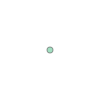

In [29]:
test_point

We'll rely on the [geopandas API](https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html#from-longitudes-and-latitudes), because this is a problem solved already.

In [30]:
import geopandas as gpd

In [31]:
gdfn1 = gpd.GeoDataFrame(
    dfn1, crs = {'init': 'epsg:4326'}, geometry=gpd.points_from_xy(dfn1['longitude_1'], dfn1['latitude_1']))

In [32]:
gdfn1.columns

Index(['individual_id', 'group_id', 'start_date_daily', 'end_date_daily',
       'start_date_monthly', 'end_date_monthly', 'last_name', 'first_name',
       'minor', 'age', 'male', 'occupation', 'occupation_detail',
       'victim_affiliation', 'victim_affiliation_detail', 'violence', 'method',
       'interrogation', 'torture', 'mistreatment', 'targeted', 'press',
       'war_tribunal', 'number_previous_arrests', 'perpetrator_affiliation',
       'perpetrator_affiliation_detail', 'nationality', 'place_1',
       'start_location_1', 'latitude_1', 'longitude_1', 'exact_coordinates_1',
       'page', 'additional_comments', 'geometry'],
      dtype='object')

Notice the new column at the end, `geometry`.

### Add a search bar

We'll use the names of the people to feed the search bar.

We'll use the `GeoJson` class to map the `geometry` attribute on top of our map. We will also use helper functions to model the shape of the icons and texts.

In [34]:
dfn1.perpetrator_affiliation.unique()

array([nan, 'Regime', 'Opposition'], dtype=object)

In [35]:
dfn1.torture.unique()

array([nan,  0.,  1.])

In [36]:
dfn1.columns

Index(['individual_id', 'group_id', 'start_date_daily', 'end_date_daily',
       'start_date_monthly', 'end_date_monthly', 'last_name', 'first_name',
       'minor', 'age', 'male', 'occupation', 'occupation_detail',
       'victim_affiliation', 'victim_affiliation_detail', 'violence', 'method',
       'interrogation', 'torture', 'mistreatment', 'targeted', 'press',
       'war_tribunal', 'number_previous_arrests', 'perpetrator_affiliation',
       'perpetrator_affiliation_detail', 'nationality', 'place_1',
       'start_location_1', 'latitude_1', 'longitude_1', 'exact_coordinates_1',
       'page', 'additional_comments', 'geometry'],
      dtype='object')

In [37]:
dfn1.occupation.unique()

array(['School Student', 'Blue Collar', 'White Collar', 'Unemployed',
       'University Student', nan, 'Military', 'Non-military Government',
       'Blue Collar and University Student',
       'White Collar and Non-military Government',
       'Blue Collar and Non-military Government',
       'White Collar and University Student',
       'Blue Collar and White Collar', 'Ex-Military',
       'Non-military Government and Ex-Military',
       'White Collar and Military', 'Housewife',
       'Blue Collar and Ex-Military'], dtype=object)

### Plotting the map

In [38]:
import typing as T
import folium

def features_marker_mapper(feature) -> folium.Icon:
    """Maps the row features to an `Icon` instance. 
    https://python-visualization.github.io/folium/modules.html#folium.map.Icon
    
    There are three icon features that will be considered: Shape, Colour and Icon
    
    Color: Red if the person was tortured, blue otherwise
    Icon: From lowest hierarchy to highest,
    - Copybook icon if it was an student, 
    - briefcase if it was a white collar
    - Hardware tools if it was a blue collar,
    - Grenade if it was military
    - Person icon in any other case
    Shape: Don't know yet.
    
    """
    
    
    icon_mapping = {
        "School Student": None,
        "Blue Collar": None,
        "White Collar": None,
        "Unemployed": None,
        "University Student": None,
        "nan": None,
        "Military": None,
        "Non-military Government": None,
        "Blue Collar and University Student": None,
        "White Collar and Non-military Government": None,
        "Blue Collar and Non-military Government": None,
        "White Collar and University Student": None,
        "Blue Collar and White Collar": None,
        "Ex-Military": None,
        "Non-military Government and Ex-Military": None,
        "White Collar and Military": None,
        "Housewife": None,
        "Blue Collar and Ex-Military": None,
    }
    
#     was_minor = None
#     was_regime = None
    was_tortured = feature['properties']['torture']
    
    _color = '#red' if was_tortured else "#blue"
    
    icon = folium.Icon(color=_color,)
    
    return icon

In [155]:
import folium
from folium.plugins import Search

def style_function(row):
    return {'color': '#0000ff' if row['properties']['method'] == "Gun" is True else '#00ff00'}

pinomap = (
    folium.Map(
        location=[
            dfn1['latitude_1'][0],
            dfn1['longitude_1'][0]],
        zoom_start=6,
        tiles='cartodbpositron'))

events_map = (
    folium.GeoJson(
        gdfn1[:50],  # We'll use the first 50 elements, because this is a prototype
        name="Events documented",
        style_function=style_function,
        tooltip=folium.GeoJsonTooltip(
            aliases=['Name', 'Last Name', 'Occupation', 'Violence Type'],
            fields=['first_name', 'last_name', 'occupation', 'method'], 
            localize=True)
    )
    .add_to(pinomap)
)


# add a search by first names
namesearch = Search(
    layer=events_map,
    geom_type='Point',
    placeholder='Escribe un nombre',
    collapsed=False,
    search_label='first_name',
    search_zoom=12,
#     weight=3
).add_to(pinomap)

# add a search by last name
lastnamesearch = Search(
    layer=events_map,
    geom_type='Point',
    placeholder='Escribe un apellido',
    collapsed=False,
    search_label='last_name',
    search_zoom=12,
).add_to(pinomap)

pinomap

### Agrupar íconos

https://medium.com/@bobhaffner/folium-markerclusters-and-fastmarkerclusters-1e03b01cb7b1

https://github.com/python-visualization/folium/issues/1129

https://github.com/python-visualization/folium/pull/1190

In [149]:
pinomap_gamma = folium.Map(
    location=[
        dfn1['latitude_1'][0],
        dfn1['longitude_1'][0]
    ],
    zoom_start=6, tiles='cartodbpositron')

# locations and popups ffor the clusters
locations = gdfn1[['latitude_1', 'longitude_1']][:50]
popups = list(gdfn1['last_name'][:50])

marker_cluster = folium.plugins.MarkerCluster(
    locations=locations,
    popups=popups,
    name='1000 clustered icons',
    overlay=True,
    control=True,
)

marker_cluster.add_to(pinomap_gamma)


# add a search by first names
# the search plugin is broken for clustered marks
# https://github.com/python-visualization/folium/issues/1209

namesearch = CustomSearch(
    layer=marker_cluster,
    geom_type='Point',
    placeholder='Escribe un nombre',
).add_to(pinomap_gamma)


folium.LayerControl().add_to(pinomap_gamma)
pinomap_gamma